# Project Title: 
- Online Payment Fraud Detection for Blossom Bank Plc

# Problem Definition: 
- To build a Machine Learning model for Blossom Bank to predict online payment fraud.

# Benefit to the business:
- The project will boost customers confidence in the Bank, increase profitability and also assist the Bank guide against online fraud risks.

In [2]:
#import pandas and numpy for data manipulation
import pandas as pd
import numpy as np

#import pyplot and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# load the data
data = pd.read_csv('Online Payment Fraud Detection.csv', index_col=False)

In [5]:
# Inspecting the first 5 rows of the data
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [6]:
# Inspecting the last 5 rows of the data
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [8]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [9]:
data.shape

(1048575, 10)

# Data Cleansing
- Handling missing values (NaN)

- Replacing text

- Removing or deleting unnecessary records

In [11]:
# Check for missing data
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

# There are no missing data

# Exploratory Data Analysis
- Visualize relationships between the label and some key features
- Explore correlations
- Conduct univariate and multivariate analysis as much as is feasible

# Univariate Analysis


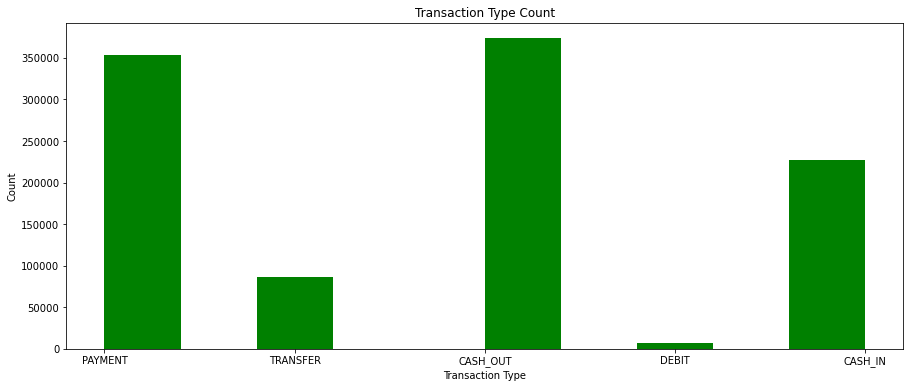

In [12]:
# Count of transaction types
fig, ax = plt.subplots(figsize=[15,6])

plt.hist(data.type, color='green')
plt.title("Transaction Type Count")
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

# The barchart shows the most type of transaction was carried out through CASHOUT

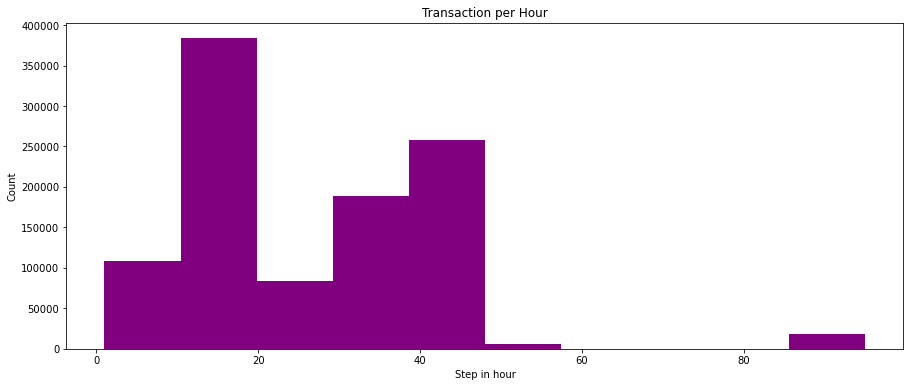

In [13]:
fig, ax = plt.subplots(figsize=[15,6])

plt.hist(data.step, color='purple')
plt.title("Transaction per Hour")
plt.xlabel('Step in hour')
plt.ylabel('Count')
plt.show()

# The above chart shows that about 39000 customers spent between 10 hrs - 20 hrs performing transactions with Blossom Bank

# Bivariate Analysis

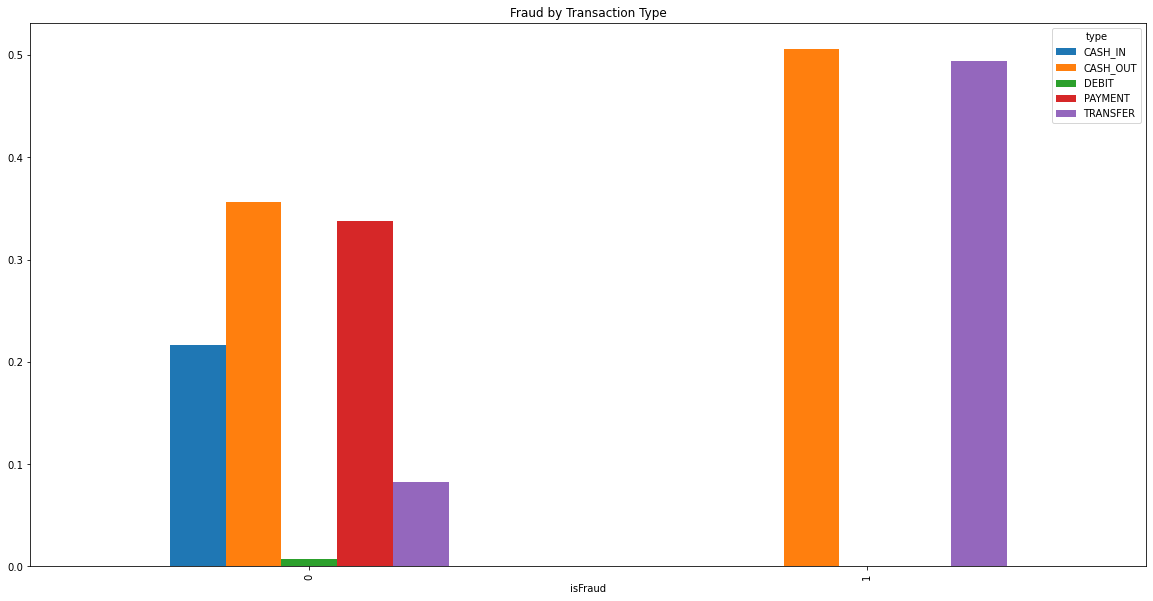

In [14]:
# Visualizing fraud against transacton type
ft = pd.crosstab(data.isFraud,data.type,normalize='index')

#plot the data
ft.plot.bar(figsize=(20,10))

plt.title('Fraud by Transaction Type')
plt.show()

# Above chart shows Cash Out is the highest transaction type that are more proned to Fraud

# Multivariate Analysis

<AxesSubplot:xlabel='amount', ylabel='oldbalanceOrg'>

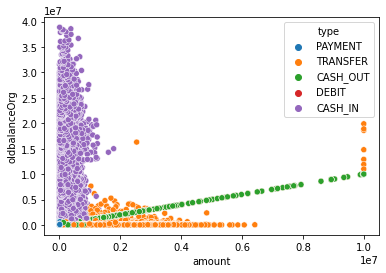

In [18]:
sns.scatterplot(data=data, x="amount", y="oldbalanceOrg", hue="type")

# From the above chart, taking the balance before transaction into consideration, customers with transaction amount between N0 and N1,000,000 performed more 'Cash-In' transactions, while there is also an increasing trend among customers that performed 'Cash Out' transaction.

<AxesSubplot:xlabel='amount', ylabel='newbalanceOrig'>

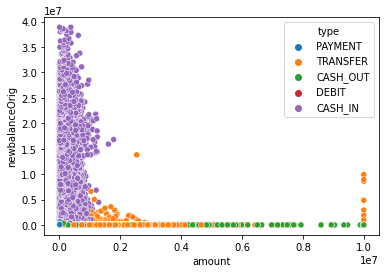

In [19]:
sns.scatterplot(data=data, x="amount", y="newbalanceOrig", hue="type")

# From the above chart, taking the balance after transaction into consideration, customers with transaction amount between N0 and N1,000,000 performed more 'Cash-In' transactions, while few customers performed transactions through 'Transfer'

<AxesSubplot:xlabel='amount', ylabel='oldbalanceDest'>

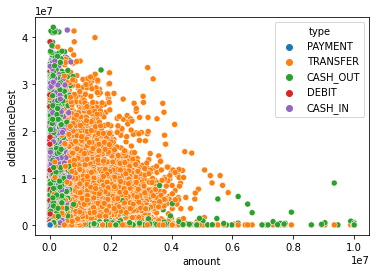

In [20]:
sns.scatterplot(data=data, x="amount", y="oldbalanceDest", hue="type")

# From the above chart, taking the 'Initial balance of the recipient before transaction' into consideration, most of the inflow into recipients' accounts came through 'Transfer'

<AxesSubplot:xlabel='amount', ylabel='newbalanceDest'>

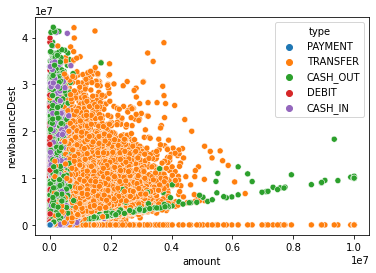

In [21]:
sns.scatterplot(data=data, x="amount", y="newbalanceDest", hue="type")

# From the above chart, taking the 'new balance of the recipient after transaction' into consideration, a high volume of inflow into recipients' accounts came through 'Transfer', while there is also an increasing trend for 'Cash Out' transactions

# Feature Engineering
- We do not need to use all the columns in our data frame to predict our target. 
- Feature selection is where you choose the features that you will use to train your model.

In [22]:
# Select columns with only integers (numeric columns) and remove columns that contain object
feature_columns = data.select_dtypes(exclude=object)
feature_columns
feature_columns.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

In [23]:
feature_columns.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,181.00,181.0,0.00,0.0,0.0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,0


In [24]:
#Convert categorical data into numerical using One-Hot Encoding
categorical = ["type"]
categorical

['type']

In [25]:
categories_dummies = pd.get_dummies(data[categorical])

categories_dummies.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [26]:
# Put the encoded variables back to the main dataframe using pd.concat()
# Pass both data and categories_dummies as a list of their names

Data1 = pd.concat([data, categories_dummies], axis=1)

# Inspect the data
print(Data1.shape)
Data1.head()

(1048575, 15)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [27]:
# Remove the initial categorical columns now that they are encoded.
# Use the list called categorical to delete all the initially selected columns at once

Data2 =Data1.drop(categorical,axis=1)

Data2

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,1,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1,0,0,0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0,1,0,0,0
1048571,95,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0,0,0,1,0
1048572,95,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0,0,0,1,0
1048573,95,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0,0,0,1,0


In [28]:
y = Data2.isFraud

In [29]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [32]:
# Dropping string columns.
features =Data2.drop(["isFraud", "nameOrig", "nameDest" ],axis=1)
features.shape

(1048575, 11)

In [33]:
features.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [36]:
X = Data2[features.columns]

In [37]:
# Import all libraries needed
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import seaborn as sns

# Train Test Split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

# Import ML algorithms and Initialize them

# Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
RF_model =  RandomForestClassifier(random_state=30)

In [41]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=30)

In [42]:
RF_preds = RF_model.predict(X_test)

In [43]:
print(accuracy_score(RF_preds, y_test))

0.9997735021338483


In [44]:
print(classification_report(RF_preds, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419060
           1       0.80      0.98      0.88       370

    accuracy                           1.00    419430
   macro avg       0.90      0.99      0.94    419430
weighted avg       1.00      1.00      1.00    419430



# KNeighbors

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
K_model = KNeighborsClassifier()

In [47]:
K_model.fit(X_train,y_train)

KNeighborsClassifier()

In [48]:
K_preds = K_model.predict(X_test)

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(accuracy_score(K_preds, y_test))

0.9993371957179983


In [51]:
print(classification_report(K_preds, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419117
           1       0.54      0.78      0.64       313

    accuracy                           1.00    419430
   macro avg       0.77      0.89      0.82    419430
weighted avg       1.00      1.00      1.00    419430



# Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB

In [53]:
NB_model = GaussianNB()

In [54]:
NB_model.fit(X_train,y_train)

GaussianNB()

In [55]:
NB_preds = NB_model.predict(X_test)

In [56]:
from sklearn.metrics import classification_report

In [57]:
print(accuracy_score(NB_preds, y_test))

0.985837922895358


In [58]:
print(classification_report(NB_preds, y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    413707
           1       0.26      0.02      0.04      5723

    accuracy                           0.99    419430
   macro avg       0.62      0.51      0.52    419430
weighted avg       0.98      0.99      0.98    419430



# Decision Tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
DT_model = DecisionTreeClassifier(random_state=30)

In [61]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=30)

In [64]:
DT_preds = DT_model.predict(X_test)

In [65]:
print(accuracy_score(DT_preds, y_test))

0.9995589252080204


In [66]:
print(classification_report(DT_preds, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    418970
           1       0.80      0.79      0.80       460

    accuracy                           1.00    419430
   macro avg       0.90      0.90      0.90    419430
weighted avg       1.00      1.00      1.00    419430



# Confusion Matrix

In [67]:
# Inport library
from sklearn.metrics import confusion_matrix

# Confusion matrix for Random Forest Classifier

In [68]:
cf_matrix = confusion_matrix(y_test, RF_preds)

print(cf_matrix)

[[418971      6]
 [    89    364]]


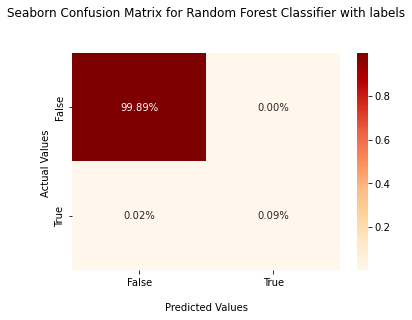

In [69]:
# Generating confusion Matrix with percentages
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='OrRd')

ax.set_title('Seaborn Confusion Matrix for Random Forest Classifier with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Confusion matrix for KNeighborsClassifier

In [70]:
cf_matrix = confusion_matrix(y_test, K_preds)

print(cf_matrix)

[[418908     69]
 [   209    244]]


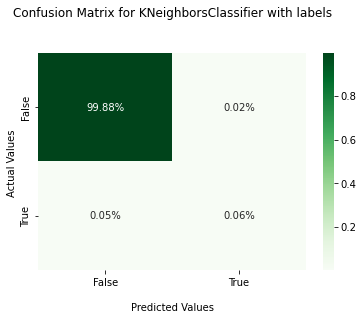

In [71]:
# Generating confusion Matrix with percentages
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Greens')

ax.set_title('Confusion Matrix for KNeighborsClassifier with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Confusion matrix for Naive Bayes Classifier

In [73]:
cf_matrix = confusion_matrix(y_test, NB_preds)

print(cf_matrix)

[[413372   5605]
 [   335    118]]


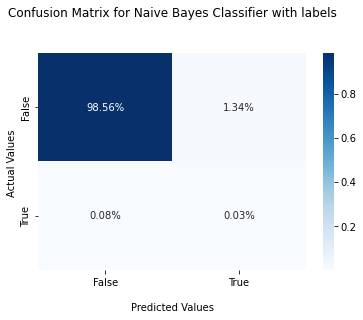

In [74]:
# Generating confusion Matrix with percentages
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Naive Bayes Classifier with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Confusion matrix for DecisionTree Classifier

In [75]:
cf_matrix = confusion_matrix(y_test, DT_preds)

print(cf_matrix)

[[418881     96]
 [    89    364]]


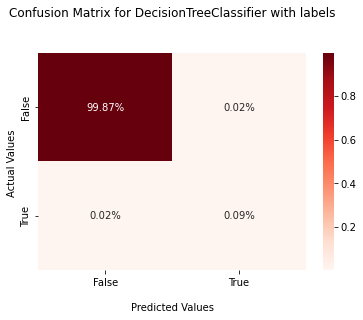

In [76]:
# Generating confusion Matrix with percentages
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Reds')

ax.set_title('Confusion Matrix for DecisionTreeClassifier with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Random Forest Classifier showed the highest accuracy and precision. 
# Confusion Matrics were optimal for Random Forest Classifier.
# Random Forest Classifier is the best  model for predicting online payment    fraud for Blossom Bank Plc.